<h1 id="header"> Data Science Discovery - Project #2 </h1>

<h3 id="header">By Sarah Wheeler</h3>

<h1 id="header">Section 1: Dataset</h1> 

As a Political Science major with a focus on International Relations, I began my search for a dataset knowing I wanted to root my project in my field of study. In particular, I hoped to find a dataset that would allow me to study the behavior of foreigners in relation to politically-controversial territories. By searching through Kaggle, I came across a dataset related to travel to Taiwan. Since the dataset documents the travelers' place of residence, date of travel, and reason for travel, I hope to use this data to understand trends (or, perhaps, the lack thereof) in Taiwan travel. 

In [1]:
!pip3 install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\swhee\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("purpose.csv")
df

,Residence,Region,Sub-Region,Period,Business,Pleasure,Visit Relatives,Conference,Study,Exhibition,Medical Treatment,Others,Unstated
0,Unstated,NaN,NaN,2011-01,1,2,2,0,0,0,0,14,2474
1,France,Europe,NaN,2011-01,1003,337,474,22,99,0,0,123,55
2,Germany,Europe,NaN,2011-01,1835,511,627,46,62,0,0,129,151
3,Italy,Europe,NaN,2011-01,517,144,137,26,10,0,0,56,43
4,Netherlands,Europe,NaN,2011-01,531,278,211,11,15,0,0,61,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3610,Netherlands,Europe,NaN,2018-09,794,692,68,38,92,10,2,288,0
3611,Italy,Europe,NaN,2018-09,645,303,59,46,89,22,0,331,0
3612,Germany,Europe,NaN,2018-09,1867,2190,255,86,358,30,1,855,0
3613,Belgium,Europe,NaN,2018-09,219,220,43,23,76,7,2,109,0


<h1 id="header">Section 2: Exploratory Data Analysis </h1>

In order to prepare my dataset for EDA, I first cleaned the data. By dropping unhelpful columns, removing null values, and checking for duplicates, I ensured that the dataset was ready for analysis. Afterwards, I used descriptive statistics to find the shape of the data, ensuring it was indeed over the 200-data-point-threshold. To gain a broader glance at the overall descriptive statistics of the dataset, I used the .describe() and .info() functions to gather a lot of information about the data in a simple, concise form. To confirm this information was indeed correct, I looked further into the "Business" column of the dataset to confirm the mean, std, max, and min were identical to the values produced by .describe() as well as determined the countries of the Business min/max values.

In [4]:
#now for some data cleaning!
df1 = df.drop(["Sub-Region"], axis = 1)
df1.isna().sum() #checking for null

#null appears in the "Regions" column when someone leaves their residence "Unstated." Let's drop the unstated rows since they won't be helpful.
df_clean = df1[df1["Residence"] != "Unstated"]

#checking for duplicates
df_clean.duplicated().sum() #none found!

0

In [5]:
#adding column to show total # of people from each country who travelled to Taiwan
df_grouped = df_clean.groupby(["Period"]).agg(sum).reset_index()
df_final = df_grouped.drop(["Residence", "Region"], axis = 1)
df_final["Total_People"] = df_final["Business"] + df_final["Pleasure"] + df_final["Visit Relatives"] + df_final["Conference"] + df_final["Study"] + df_final["Exhibition"] + df_final["Medical Treatment"] + df_final["Others"] + df_final["Unstated"]
df_final

,Period,Business,Pleasure,Visit Relatives,Conference,Study,Exhibition,Medical Treatment,Others,Unstated,Total_People
0,2011-01,76283,216900,48702,4263,2158,0,0,26423,23395,398124
1,2011-02,70742,259818,45508,3899,15019,0,0,28941,26744,450671
2,2011-03,89667,316750,39590,6496,3108,0,0,48523,10918,515052
3,2011-04,83532,350867,40944,6978,2444,0,0,49693,12925,547383
4,2011-05,89321,274026,35449,6858,2715,0,0,47804,10583,466756
...,...,...,...,...,...,...,...,...,...,...,...
88,2018-05,64977,561696,39488,6351,4425,755,2416,162061,0,842169
89,2018-06,68812,574476,45468,6859,5125,4011,2290,149374,0,856415
90,2018-07,60577,573470,45384,5977,5276,968,3097,158509,0,853258
91,2018-08,55610,677872,38230,4708,7571,1394,2784,164961,0,953130


In [6]:
df_final.shape #over the 200 data-point threshold!

(93, 11)

In [7]:
df_final.describe()

,Business,Pleasure,Visit Relatives,Conference,Study,Exhibition,Medical Treatment,Others,Unstated,Total_People
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,9.300000e+01
mean,68315.053763,527351.086022,37147.677419,5480.279570,5598.892473,1107.290323,4088.010753,111947.731183,2307.494624,7.633435e+05
std,11376.633349,139393.492802,6177.676796,1762.815037,4024.601270,1014.157174,2979.619225,44005.108649,6286.655338,1.623860e+05
min,41646.000000,216900.000000,26298.000000,2052.000000,2158.000000,0.000000,0.000000,26423.000000,0.000000,3.981240e+05
25%,59713.000000,416951.000000,32179.000000,4485.000000,2918.000000,467.000000,2449.000000,74326.000000,0.000000,6.311560e+05
50%,67344.000000,570401.000000,36383.000000,5127.000000,3978.000000,823.000000,3116.000000,120592.000000,0.000000,8.169720e+05
75%,76926.000000,625114.000000,41605.000000,6496.000000,5954.000000,1498.000000,5514.000000,141023.000000,0.000000,8.704120e+05
max,91812.000000,838364.000000,52402.000000,12532.000000,17581.000000,4679.000000,13307.000000,276682.000000,26744.000000,1.112053e+06


In [8]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Period             93 non-null     object
 1   Business           93 non-null     int64 
 2   Pleasure           93 non-null     int64 
 3   Visit Relatives    93 non-null     int64 
 4   Conference         93 non-null     int64 
 5   Study              93 non-null     int64 
 6   Exhibition         93 non-null     int64 
 7   Medical Treatment  93 non-null     int64 
 8   Others             93 non-null     int64 
 9   Unstated           93 non-null     int64 
 10  Total_People       93 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 8.1+ KB


In [9]:
print("Dataset Time Range:", df_final["Period"].min(), "-" , df_final["Period"].max())

Dataset Time Range: 2011-01 - 2018-09


In [10]:
#Let's look into those going to Taiwan for business
m1 = df_final["Business"].mean()
std1 = df_final["Business"].std()
max_time = df_final["Business"].max()
min_time = df_final["Business"].min()
print("Mean of those travelling to Taiwan for business per month:", m1)
print("Standard Deviation of those travelling to Taiwan for business per month:", std1)
print("In the most popular business travel time-period, how many business travelers were headed to Taiwan?", max_time)
print("In the least popular business travel time-period, how many business travelers were headed to Taiwan?", min_time)

Mean of those travelling to Taiwan for business per month: 68315.05376344085
Standard Deviation of those travelling to Taiwan for business per month: 11376.63334892066
In the most popular business travel time-period, how many business travelers were headed to Taiwan? 91812
In the least popular business travel time-period, how many business travelers were headed to Taiwan? 41646


In [11]:
min_time_tot = df_final["Period"][df_final["Business"] == min_time]
max_time_tot = df_final["Period"][df_final["Business"] == max_time]
print("The least number of business travelers to Taiwan from a single country over a month (with date):", str(min_time_tot).strip("\n'Name: Period, dtype: object'"))
print("The most number business travelers to Taiwan from a single country over a month:", str(max_time_tot).strip("\n'Name: Period, dtype: object'"))

The least number of business travelers to Taiwan from a single country over a month (with date): 85    2018-02
The most number business travelers to Taiwan from a single country over a month: 10    2011-11


<h1 id="header">Section 3: Exploratory Data Visualization</h1>

In my EDA, I examined the range of dates in the dataset, finding that data was collected every month between January 2011 and September 2018. Furthermore, I looked at the minimum and maximum numbers of business travelers for the dataset range. Thus, the plot below seeks to demonstrate the relationship (if any) between the date and the number of business travelers to Taiwan. There is a clear negative correlation between the two variables, with the number of business travelers decreasing as time goes on. Note: the Date is fomatted YearMonth, so 201106 is June 2011.

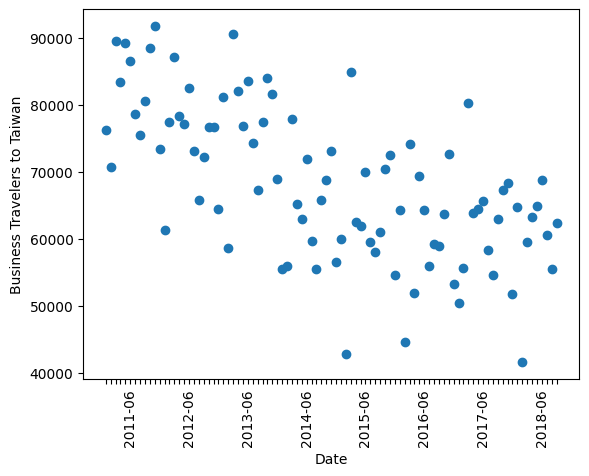

<Figure size 750x350 with 0 Axes>

In [12]:
plt.scatter( x = df_final["Period"], y = df_final["Business"])
plt.xlabel("Date")
plt.ylabel("Business Travelers to Taiwan")

labels = []
for i in df_final["Period"]:
    if i.__contains__('06'):
        i = i
    else:
        i=' '
    labels.append(i)
plt.xticks(ticks= df_final["Period"], labels = labels) 
plt.xticks(rotation=90)

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
spacing = 0.100
fig.subplots_adjust(bottom=spacing)
plt.show()

<h1 id="header">Section 4: Data Science</h1>

Since the relationship between the date and the number of business travelers to Taiwan appeared negatively correlated, I would like to explore the overall relationship between date and number of travelers. That is, as time goes on, is there a significant difference in the amount of travelers per month to Taiwan? 
Creating similar visualizations to the one displayed in Section 3 will help evaluate whether or not a relationship exists. Furthermore, I will use machine learning to try and predict the number of Taiwan travelers for a certain day during the collection period. This will be conducted through linear regression assuming there exists a significant relationship.

Hypothesis (null): There exists no significant relationship between date and total number of travelers.

Hypothesis (alternative): There exists a significant relationship between date and total number of travelers.

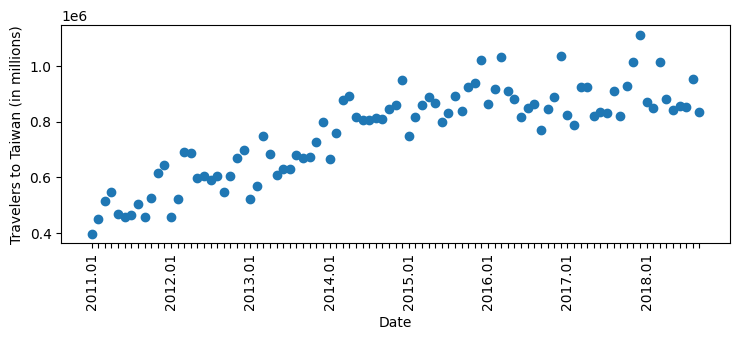

<Figure size 750x350 with 0 Axes>

In [13]:
df_final['Period'] = df_final['Period'].replace({'-':'.'}, regex=True)

plt.scatter( x = df_final["Period"], y = df_final["Total_People"])
plt.xlabel("Date")
plt.ylabel("Travelers to Taiwan (in millions)")

labels = []
for i in df_final["Period"]:
    if i.__contains__('.01'):
        i = i
    else:
        i=' '
    labels.append(i)
plt.xticks(ticks= df_final["Period"], labels = labels) 
plt.xticks(rotation=90)

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
spacing = 0.100
fig.subplots_adjust(bottom=spacing)
plt.show()

From the graph alone, there appears to be a positive correlation between the date and the number of travelers! This is particularly interesting given the results of the business travelers graph (Section 3), and potentially indicates a shift towards other types of travel over time. First though, let's verify the relationship between total travelers and date.

In [14]:
print("Max:", df_final["Total_People"].max(), "Min:", df_final["Total_People"].min(), "Mean:", df_final["Total_People"].mean())
#These values align with what we see on the graph!

Max: 1112053 Min: 398124 Mean: 763343.5161290322


In [15]:
df_final.corr()

,Period,Business,Pleasure,Visit Relatives,Conference,Study,Exhibition,Medical Treatment,Others,Unstated,Total_People
Period,1.000000,-0.637895,0.774180,-0.111023,-0.122177,0.086693,0.262323,-0.047230,0.857139,-0.558496,0.827898
Business,-0.637895,1.000000,-0.550876,-0.100001,0.574935,-0.247157,0.218089,0.050355,-0.663507,0.413219,-0.568027
Pleasure,0.774180,-0.550876,1.000000,-0.140951,-0.037520,-0.154163,0.259862,0.184360,0.716328,-0.598754,0.986168
Visit Relatives,-0.111023,-0.100001,-0.140951,1.000000,-0.212126,-0.127874,-0.178922,-0.264191,-0.224262,0.305082,-0.150356
Conference,-0.122177,0.574935,-0.037520,-0.212126,1.000000,-0.198216,0.116429,-0.105856,-0.098605,0.269144,-0.011571
Study,0.086693,-0.247157,-0.154163,-0.127874,-0.198216,1.000000,-0.130498,-0.084899,0.094696,0.014542,-0.108031
Exhibition,0.262323,0.218089,0.259862,-0.178922,0.116429,-0.130498,1.000000,0.266872,0.210083,-0.405109,0.281959
Medical Treatment,-0.047230,0.050355,0.184360,-0.264191,-0.105856,-0.084899,0.266872,1.000000,0.016682,-0.509058,0.153308
Others,0.857139,-0.663507,0.716328,-0.224262,-0.098605,0.094696,0.210083,0.016682,1.000000,-0.551547,0.812419
Unstated,-0.558496,0.413219,-0.598754,0.305082,0.269144,0.014542,-0.405109,-0.509058,-0.551547,1.000000,-0.592758


Looking at the intersection of Period and Total_People above, there exists a correlation coefficient of 0.827898. This confirms our hypothesis that there is a significant relationship between the two variables, as 0.827898 indicates a significantly positive correlation. While this is not a perfect correlation, it is strong and linear. Thus, we can reject the null hypothesis. 


Moving on, let's use machine learning to train a model to predict the number of travelers to Taiwan in any particular month in the collection period. To avoid extrapolation, dates before January 2011 or after September 2018 will not be predicted.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [17]:
y = df_final["Total_People"]
X = df_final[["Period"]].astype(float)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [18]:
model = LinearRegression() #brings the model in
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_val)
y_pred

array([564046.78388661, 682526.87214804, 799264.60617031, 623286.82801732,
       621544.47377819, 796941.4671848 , 853858.37233   , 742347.70102513,
       684269.22638717, 914259.98595345, 914840.77069984, 566950.70761852,
       799845.39091669, 856762.29606189, 741186.13153237, 801587.74515583,
       567531.4923649 , 626771.5364956 , 857923.86555465])

In [20]:
pred = pd.DataFrame((y_val.values.flatten(), y_pred.flatten()))
pred

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,515052.000000,629357.000000,894149.00000,597285.000000,522652.000000,887819.000000,919366.00000,846430.000000,672588.000000,835313.000000,832999.0000,503401.000000,837233.000000,848707.000000,812329.000000,1.022087e+06,457574.000000,668741.000000,771336.000000
1,564046.783887,682526.872148,799264.60617,623286.828017,621544.473778,796941.467185,853858.37233,742347.701025,684269.226387,914259.985953,914840.7707,566950.707619,799845.390917,856762.296062,741186.131532,8.015877e+05,567531.492365,626771.536496,857923.865555


In [21]:
print("Predicted Mean:", y_pred.mean())
print("Actual Mean:", y_val.mean())
print("Residual of Means:", y_val.mean() - y_pred.mean()) 

Predicted Mean: 737670.8554358577
Actual Mean: 740758.8421052631
Residual of Means: 3087.98666940548


In [22]:
rmse = np.sqrt(metrics.mean_squared_error(y_val, y_pred))
print("RMSE:", rmse) #checking the Root-Mean-Squared-Error

RMSE: 86349.56559263828


To check the accuracy of this model and to use what I have learned in previous labs, I will also manually calculate a regression line. Afterwards, the model's average (which was trained on 80% of the data) can be compared to the manual average (no split).

In [23]:
#now, let's find the slope of the line of best fit
slope = (df_final["Total_People"].std()/df_final["Period"].astype(float).std())*(df_final.corr().loc["Period", "Total_People"])
slope

59786.16995237614

In [24]:
intercept = df_final["Total_People"].mean() - (slope*df_final["Period"].astype(float).mean())
intercept

-119672945.11615762

In [25]:
manx = slope*df_final["Period"].astype(float)+ intercept
monx = model.coef_*df_final["Period"].astype(float) + model.intercept_

In [26]:
print("Manual Mean:", manx.mean())
print( "Model Mean:", monx.mean())
#Checking for the difference in means (keep in mind the model was only trained on 20% of the data):
print("Differences in Predicted Means:", manx.mean() - monx.mean())

Manual Mean: 763343.5161290446
Model Mean: 762712.6371320438
Differences in Predicted Means: 630.8789970007492


In [27]:
#predicting a specific day within the time period with model
x = 2011.065 #this number (as specified in the notes) would refer to halfway through June 2011. Since june has 30 days, this is exactly June 15th.
result =  model.coef_*x + model.intercept_
print("On June 15th, 2011, the predicted amount of Travelers to Taiwan is as follows:", result)

On June 15th, 2011, the predicted amount of Travelers to Taiwan is as follows: [566079.53049895]


In [28]:
#predicting a specific day within the time period with manual calcualtion
x = 2011.065 #this number (as specified in the notes) would refer to halfway through June 2011. Since june has 30 days, this is exactly June 15th.
result =  slope*x + intercept
print("On June 15th, 2011, the predicted amount of Travelers to Taiwan is as follows:", result)

On June 15th, 2011, the predicted amount of Travelers to Taiwan is as follows: 560928.7591177076


<h1 id="header">Section 5: Overall Summary</h1>

Using the Taiwan Travel Purpose dataset, I aimed to look at trends in Taiwan travel over time. After cleaning the data by removing nulls and duplicates, I grouped collection months together and calculated the total number of travelers per month. Following this, my dataset had 1,023 data points to be used for analysis. In my first visualization, I looked at the relationship between time and those traveling for business, finding a negative correlation between the two. This formed the basis for my analysis in Section 4, where my alternative hypothesis stated there was a significant relationship between total travelers per month and time. After visualizing the data and determining the r-coefficient, I was able to reject the null hypothesis. I then turned my sights to predicting the number of travelers per month. I used a Linear Regression model to train 80% of my data, and then tested it on the remaining 20%. Then, I manually generated the equation for the line of best fit using the entirety of the data. Both appeaered to be relatively accurate. Afterwards, I compared the model predictions to those generated by the line of best fit, noting differences in both. 